# Actividad


---
Por: Ángela Córdoba


---




In [1]:
# Importar bibliotecas necesarias
import pandas as pd

In [2]:
# Importar conjunto de datos
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# Descripción del dataset
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [4]:
# Recuento de valores únicos en la columna 'sentiment'
# Permite ver cuántas revisiones están etiquetadas como positivas o negativas
print("Total :\n", df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Preprocesamiento de las secuencias

In [6]:
# Inicialización de listas
review = []

# Bucle de iteración para almacenar revisiones
sentences = list(df['review'])
for sen in sentences:
  review.append(sen)

In [7]:
# Creación de etiquetas
import numpy as np

labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [8]:
# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [9]:
# Parámetros
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = "post"
oov_tok = "<OOV>"

In [11]:
# Tokenización y acolchado de secuencias
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

In [12]:
# Construcción del modelo
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo (arquitectura de la red neuronal, número de parámetros, flujo de datos)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6784 - loss: 0.5616 - val_accuracy: 0.7584 - val_loss: 0.4966
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8319 - loss: 0.3799 - val_accuracy: 0.7988 - val_loss: 0.4325
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8688 - loss: 0.3034 - val_accuracy: 0.7874 - val_loss: 0.4787
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9049 - loss: 0.2313 - val_accuracy: 0.7756 - val_loss: 0.5413
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9360 - loss: 0.1682 - val_accuracy: 0.7676 - val_loss: 0.6546
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9644 - loss: 0.1080 - val_accuracy: 0.7650 - val_loss: 0.8004
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9809 - loss: 0.0675 - val_accuracy: 0.7637 - val_loss: 1.0066
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9918 - loss: 0.0370 

<Axes: >

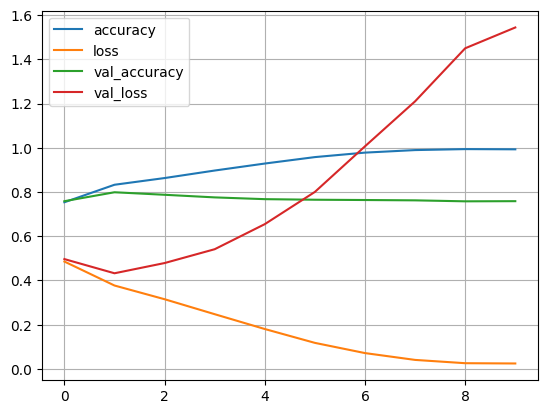

In [14]:
# Entrenamiento del modelo
num_epochs = 10
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.7585
Precision: 0.7585029353499498
Recall: 0.7585
F1 Score: 0.7621861152141802
Matriz de confusión: [[3715 1234]
 [1181 3870]]


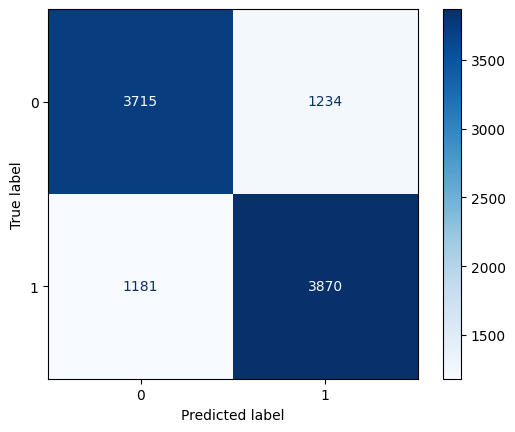

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(testing_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular métricas de evaluación
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
print('Matriz de confusión:', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


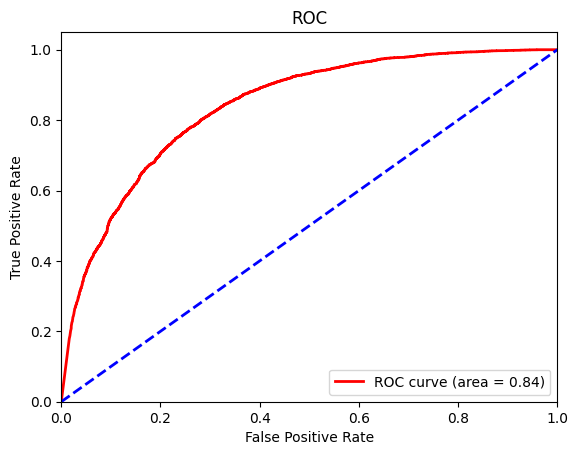

AUC: 0.84


In [19]:
from sklearn.metrics import roc_curve, auc

# Probabilidades de las predicciones
y_prob = model.predict(testing_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

### Preguntas

1. ¿Qué hace el código en general?
> Construir y entrenar un modelo de red neuronal que clasifica las revisiones de películas como positivas o negativas.

2. ¿Cuál es el propósito de cada parte del código?
> Preparar datos, definir la arquitectura del modelo, compilar el modelo, entrenar el modelo, evaluar el rendimiento del modelo en términos de precisión y pérdida.

3. ¿Por qué se utilizan los parámetros específicos en cada función (por ejemplo, num_words, embedding_dim, input_length, loss, optimizer, etc.)?
> Definir el tamaño del vocabulario, especificar la dimensión de los vectores de embedding, definir la longitud de las secuencias, ver cómo de bien clasifica el modelo a las revisiones y ajustar los pesos del modelo, respectivamente.

4. ¿Cuál es la diferencia entre train_sentences y test_sentences?
> Unas son pra entrenar el modelo y la otras para evaluar el rendimiento del modelo.

5. ¿Qué significan vocab_size, max_length, embedding_dim y oov_tok?
> Número máximo de palabras, longitud máxima de las secuencias, dimensión de los vectores y token usado para palabras que están fuera del vocabulario definido, respectivamente.

6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?
> Para transformar las palabras en vectores, convertir la salida de la capa de embedding en una forma adecuada, realizar clasificación combinada con las características con activaciones ReLU y producir una salida binaria entre 0 y 1.

7. ¿Qué representan las métricas de pérdida y precisión en el modelo?
> Una mide la diferencia de las predicciones del modelo y la etiquetas reales; y la otra mide el porcentaje de predicciones correctas en el modelo.

8. ¿Qué pasa durante el entrenamiento del modelo?
> Se ajustan los pesos o parámetros para minimizar la pérdida al usar los datos del entrenamiento.

9. ¿Qué significan las épocas y cómo afectan al proceso de entrenamiento?
> Es el número de veces que el modelo procesa el dataset. Más épocas implica mayor precisión.

10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?
> Asegura que funcione bien y evalúa la capacidad del modelo para generalizar lo visto en datos nuevos y no vistos.

11. ¿Cuál es el objetivo final del código?
> Construir un modelo que clasifique con precisión las opiniones de películas.